# HAB_Capstone_EDA

In this notebook I will continue to explore the GLERL data set which contains measurements related to Lake Erie water quality and the growth of Harmful Algal Blooms (HABs). Individual series distributions have already been explored and visualized in the HAB_Capstone_Data_Wrangling_2 notebook. Here I will begin to examine relationships and correlations (or lake thereof) between data series.

In [249]:
import datetime as dt
import folium
import geopy.distance
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.api as sm 
#from statsmodels.graphics.api import abline_plot  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing

In [2]:
surface = pd.read_csv('../data/interim/surface.csv', index_col=0, parse_dates=['Date'])

In [3]:
surface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 986
Data columns (total 35 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           987 non-null    datetime64[ns]
 1   Site                                                           987 non-null    object        
 2   Station Depth (m)                                              977 non-null    float64       
 3   Sample Depth (m)                                               987 non-null    float64       
 4   Sample Depth (category)                                        987 non-null    object        
 5   Local Time (Eastern Time Zone)                                 981 non-null    object        
 6   Latitude (decimal deg)                                         987 non-null    float64       
 7  

In [4]:
surface.head()

,Date,Site,Station Depth (m),Sample Depth (m),Sample Depth (category),Local Time (Eastern Time Zone),Latitude (decimal deg),Longitude (decimal deg),Wind speed (knots),Wave Height (ft),...,Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L),Month,Phosphate (µg/L)
0,2012-05-15,WE4,10.0,0.75,Surface,10:08,41.8267,-83.1933,NaN,NaN,...,2.02,28.79,0.325,0.34,0.05,NaN,3.15,1.01,12-May,NaN
1,2012-05-15,WE6,2.7,0.75,Surface,11:02,41.7052,-83.3853,NaN,NaN,...,2.97,35.70,0.515,0.40,0.08,NaN,2.90,0.98,12-May,NaN
2,2012-05-15,WE8,4.5,0.75,Surface,11:31,41.8339,-83.3640,NaN,NaN,...,3.02,11.28,0.513,0.49,0.12,NaN,4.32,1.06,12-May,NaN
3,2012-05-31,WE2,8.2,0.75,Surface,11:15,41.7625,-83.3286,NaN,NaN,...,5.15,14.68,0.466,0.50,0.07,NaN,21.42,2.40,12-May,NaN
4,2012-05-31,WE4,5.0,0.75,Surface,11:50,41.8265,-83.1934,NaN,NaN,...,0.37,15.38,0.323,0.99,0.16,NaN,4.92,1.52,12-May,NaN


In [5]:
#Let's start by examining any correlations
surface.corr()

,Station Depth (m),Sample Depth (m),Latitude (decimal deg),Longitude (decimal deg),Wind speed (knots),Wave Height (ft),Secchi Depth (m),CTD Temperature (°C),CTD Specific Conductivity (µS/cm),CTD Beam Attenuation (m-1),...,Total Dissolved Phosphorus (µg P/L),Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L),Phosphate (µg/L)
Station Depth (m),1.000000,-0.040674,0.271050,0.706128,-0.028259,0.130332,0.427929,0.000905,-0.563265,-0.370404,...,-0.343787,-0.306362,-0.079576,-0.308908,-0.126306,-0.121500,-0.447828,-0.260191,-0.147356,-0.030075
Sample Depth (m),-0.040674,1.000000,-0.037338,-0.021537,-0.020694,0.002779,-0.034082,0.025902,0.034722,0.023235,...,0.018208,0.012939,-0.011324,0.016573,0.007217,0.007065,0.031554,0.014447,0.007913,0.006286
Latitude (decimal deg),0.271050,-0.037338,1.000000,-0.255616,0.089092,0.076596,0.233684,-0.003691,-0.138097,-0.191839,...,-0.139409,-0.160250,-0.050719,-0.078654,0.000500,0.004706,-0.136982,-0.104255,-0.003200,0.069024
Longitude (decimal deg),0.706128,-0.021537,-0.255616,1.000000,-0.080957,0.095574,0.372534,-0.011079,-0.520234,-0.347868,...,-0.346489,-0.314764,-0.095732,-0.333844,-0.101270,-0.097753,-0.453144,-0.240405,-0.118816,-0.048005
Wind speed (knots),-0.028259,-0.020694,0.089092,-0.080957,1.000000,0.465553,0.041083,-0.033844,0.128482,0.036625,...,-0.080944,-0.006834,0.131272,0.035567,-0.089864,-0.083001,-0.078646,-0.009407,-0.094824,0.029799
Wave Height (ft),0.130332,0.002779,0.076596,0.095574,0.465553,1.000000,-0.026576,-0.300846,-0.038124,0.030429,...,-0.061429,-0.023867,0.056171,-0.014095,-0.089970,-0.082520,-0.111623,-0.002070,-0.080400,0.022263
Secchi Depth (m),0.427929,-0.034082,0.233684,0.372534,0.041083,-0.026576,1.000000,0.126829,-0.250374,-0.551407,...,-0.258632,-0.268288,-0.087403,-0.105612,-0.166252,-0.171754,-0.332398,-0.398211,-0.174152,-0.028110
CTD Temperature (°C),0.000905,0.025902,-0.003691,-0.011079,-0.033844,-0.300846,0.126829,1.000000,-0.024559,-0.277420,...,-0.072686,-0.085707,-0.149421,0.075894,0.049243,0.053917,0.079161,-0.166454,0.039030,0.027959
CTD Specific Conductivity (µS/cm),-0.563265,0.034722,-0.138097,-0.520234,0.128482,-0.038124,-0.250374,-0.024559,1.000000,0.272062,...,0.451716,0.400314,0.260301,0.557787,0.025187,0.026978,0.482888,0.139831,0.038249,0.009142
CTD Beam Attenuation (m-1),-0.370404,0.023235,-0.191839,-0.347868,0.036625,0.030429,-0.551407,-0.277420,0.272062,1.000000,...,0.441942,0.523683,0.244933,0.286506,0.132241,0.130171,0.486763,0.637263,0.158099,-0.007959


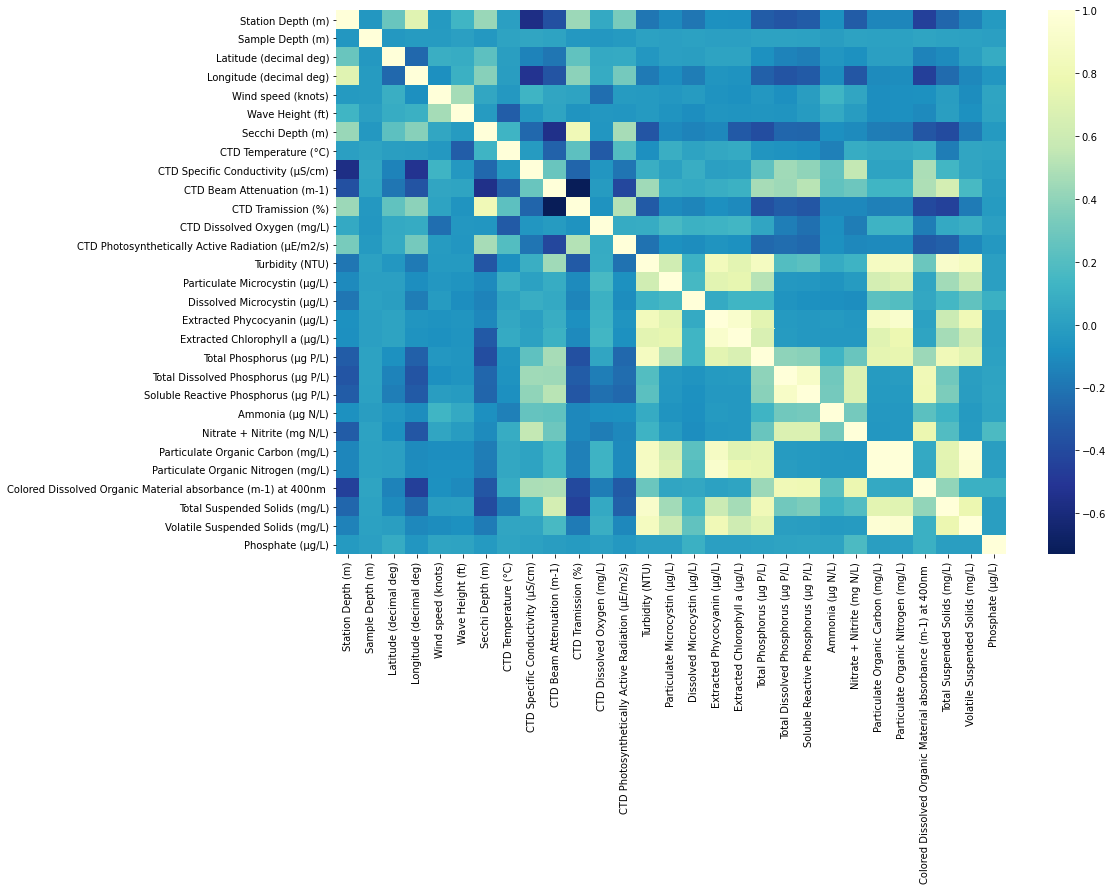

In [6]:
#Visualize the correlations with a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(surface.corr(), cmap='YlGnBu_r')
plt.show()

Some of the correlations in the above heatmap can be explained with straightforward relationships between scientific quantities. For example, transmission and beam attenuation have the defined relationship: 

    c=-(1/r)*ln(%Tr/100) 
    where c=beam attenuation coefficient (m^-1), r=beam path length (m), and Tr=% beam transmission
    
Other relationships are not strictly defined mathematically but are expected. For example, Secchi depth is the depth at which a Secchi disk is no longer visible, which should naturally increase with percent light transmission, and decrease with beam attenuation, increasing turbidity, and increasing particulate matter in the water. Turbidity has a large number of strong positive correlations, which also makes sense since turbidity is simply a measure of the cloudiness of the water, which naturally increases as particulate matter increases, and relates directly to transmission and attenuation.

Quantities indicating the growth of algae, phytoplankton, and cyanobacteria such as Phycocyanin, Chlorophyll, and Particulate Microcystin all have positive correlations with each other, as well as weaker correlations with Turbidity and Total Phosphorus. This may at first seem strange since we know that these creatures consume Phosphorus, but Total Phosphorus should include any phosphorus that was incorporated into the actual algae itself. Note that dissolved forms of Phosphorus do not show any correlation with Phycocyanin, Chlorophyll, or Particulate Microcystin.

Specific conductivity has some weak positive correlations with various chemical quantities of interest, notably Nitrates and Nitrites, Total Dissolved Phosphorus, and Dissolved Organic Material. This could be due to direct effect, as Nitrates and Nitrites are negatively charged anions, and many dissolved forms of phosphorus and organic material are likely also ions. This could also be due to correlation, since N- and P-containing compounds tend to come from runoff or lake inflows that can also carry other ionic compounds (e.g. halides). Interestingly, besides Total Phosphorus it does not seem like nutrients such as the N-containing compounds or soluble P-containing compounds have any notable correlation with Microcystin amounts. In the case of Total Phosphorus as noted above this may very well be because the Total Phosphorus may include intracellular Phosphorus, and would therefore just be another indication of the presence of an HAB, rather than an independent correlated measurement. The lack of correlation between the Microcystin amount and known HAB nutrients is possibly because of the time lag between the establishment of an HAB-friendly environment (warm temperatures, nutrient-rich) and the growth of the HAB itself. Also, as the HAB grows it consumes nutrients, decreasing their amounts until the bloom can no longer be sustained. This suggests that some sort of time series analysis may be necessary.

Interestingly, Temperature and Dissolved Oxygen don't have many strong correlations. They have a weak correlation with each other - warmer temperatures correlate with less dissolved oxygen, with the plausible mechanistic hypothesis that warmer temperature promote the growth of aerobic organisms that consume oxygen.  Temperature is also naturally correlated with sample depth (deeper samples are colder). 

We can take a closer look at scatterplots of the various correlations.

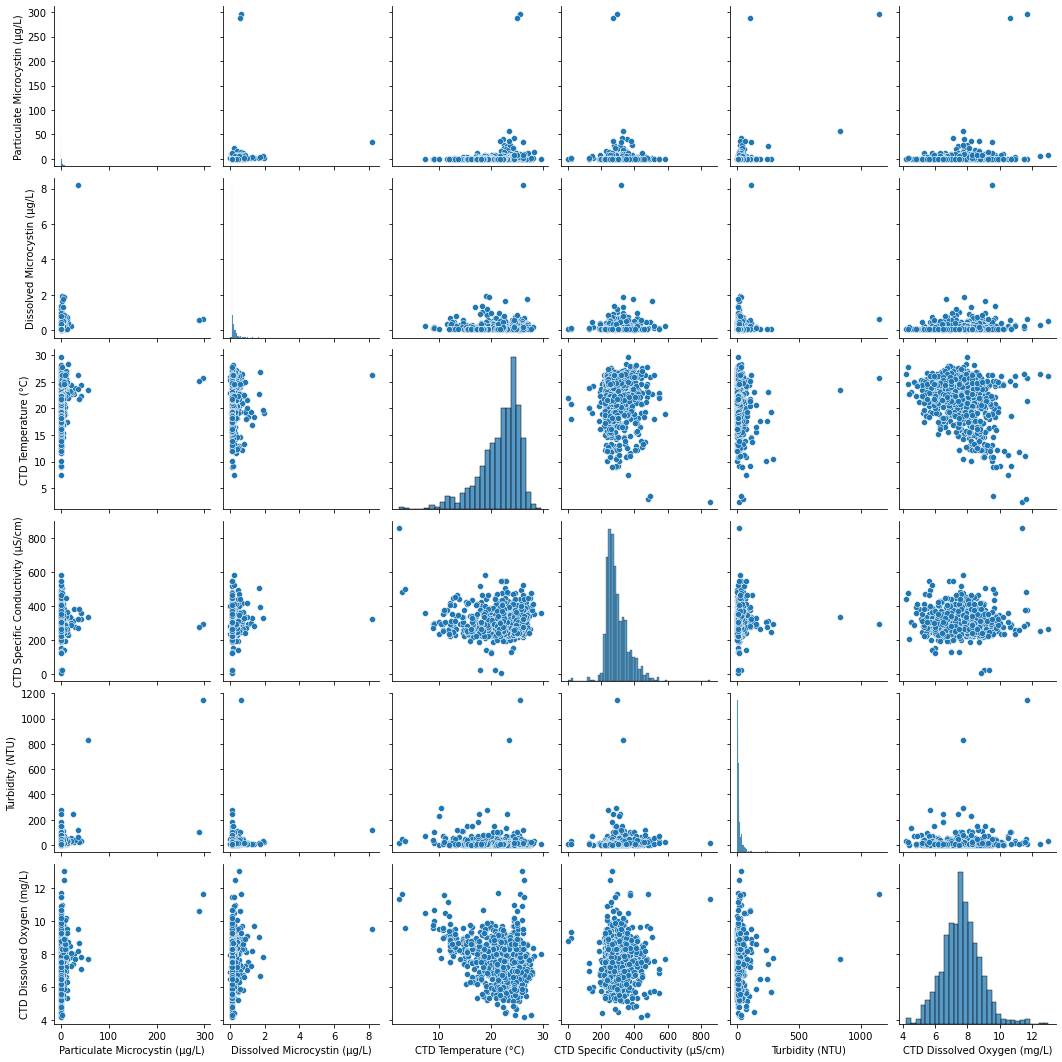

In [7]:
#Pairplot of physical environmental inputs and HAB indicators
sns.pairplot(data=surface,
             vars=['Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)','CTD Temperature (°C)', 'CTD Specific Conductivity (µS/cm)', 'Turbidity (NTU)', 'CTD Dissolved Oxygen (mg/L)'])

There are no clear correlations here with the possible exception of the weak negative correlation between temperature and dissolved oxygen.

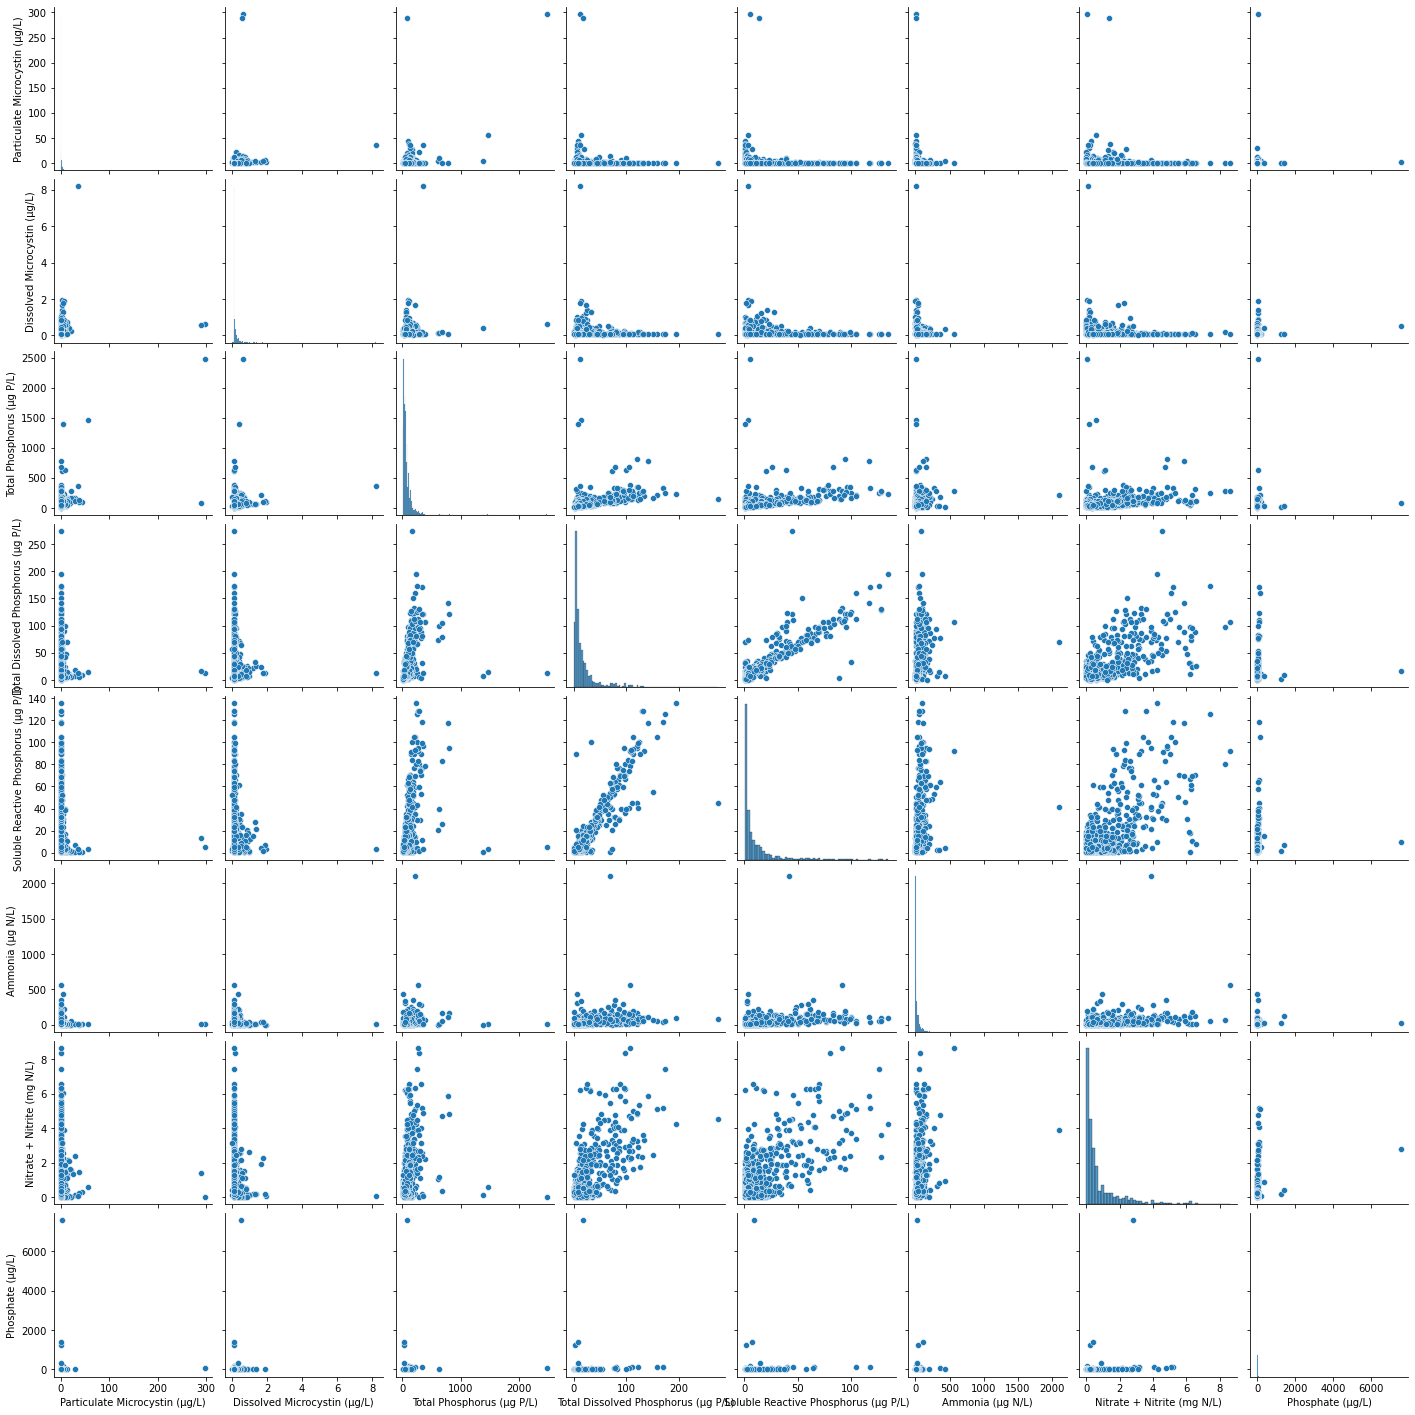

In [8]:
#Pairplot of chemical environmental inputs and HAB indicators
sns.pairplot(data=surface,
             vars=['Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)', 'Total Phosphorus (µg P/L)', 
                   'Total Dissolved Phosphorus (µg P/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Ammonia (µg N/L)', 
                   'Nitrate + Nitrite (mg N/L)', 'Phosphate (µg/L)'])

There are some correlations between nutrients that we noted earlier - soluble forms of phosphorus tend to weakly correlate with nitrates and nitrites. Soluble reactive phosphorus is strongly correlated with total dissolved phosphorus. We can also confirm that there is no clear correlation between the microcystin amounts and the nutrient amounts. 

Let's explore the hypothesis of a time lag between favorable HAB growth conditions and HAB indicators. We need to look at how these values vary over time at a given location. First let's see if there are any geographical patterns in where HAB indicators tend to be highest.

In [9]:
#Select data points with top microcystin values. 
top_mcn = surface[surface['Particulate Microcystin (µg/L)'] >= surface['Particulate Microcystin (µg/L)'].quantile(0.9)]

In [10]:
def mapsites(df, col=None):
    """Maps site measurements and labels them by site name and date. If a numeric column name is optionally entered then the
    icons will be color coded according to value quartile, with green as the lowest quartile up to dark red as the top quartile."""
    m = folium.Map(location=[41.76, -83.26])
    if col:
        crange = df[col].describe()
    for i in df.index:
        lat = df.loc[i, 'Latitude (decimal deg)']
        long = df.loc[i, 'Longitude (decimal deg)']
        site = df.loc[i,'Site']
        date = df.loc[i, 'Date']

        if col:
            val = df.loc[i, col]
            if val <= crange['25%']:
                color = 'green'
            elif val <= crange['50%']:
                color = 'orange'
            elif val <= crange['75%']:
                color = 'red'
            else:
                color = 'darkred'
            folium.Marker([lat, long], popup=(lat,long), tooltip=(site, date), icon=folium.Icon(color=color)).add_to(m)
        else:
            folium.Marker([lat, long], popup=(lat,long), tooltip=(site, date)).add_to(m)
            
    return m

In [11]:
#Map top 10% of microcystin values and color code icons according to particulate microcystin quartiles within that data set. 
mapsites(top_mcn, col='Particulate Microcystin (µg/L)')

It seems the top microcystin measurements tend to be near the shore. This matches intuition on several counts:

1. The water at these locations is shallower and may be expected to reach higher temperatures for longer periods of time.
2. Areas near the shore will have higher concentrations of nutrients due to runoff. In particular the Maumee River that flows into Lake Erie near site WE6 is a major source of nutrient loading into the lake due to agricultural runoff. The river was identified as an area of concern by the EPA 1987 Great Lakes Water Quality Agreement for this reason [<a href='https://19january2017snapshot.epa.gov/maumee-river-aoc_.html'>ref</a>].

We can compare the top 10% of microcystin observations with the bottom 50%.

In [12]:
low_mcn = surface[surface['Particulate Microcystin (µg/L)'] <= surface['Particulate Microcystin (µg/L)'].quantile(0.5)]

In [13]:
mapsites(low_mcn)

These sites tend to be much more evenly distributed and reflective of the general measurement space. 

In [14]:
#Select closely grouped 'WE6' observations
we6 = surface[(surface.Site == 'WE6') & (surface['Latitude (decimal deg)'] < 41.79) 
              & (surface['Longitude (decimal deg)'] > -83.45)]

In [15]:
#Confirm that measurements are within one area
mapsites(we6)

## Time Lag Plots

Is there a discernable time lag in favorable HAB conditions and HAB formation? We can start by visually inspecting the data.

In [119]:
def timeplot(df, cols, datecol='Date', logy=False, squish=False, title=None):
    
    """Plots columns in a dataframe with a DateTime column as subplots with the DateTime as the x-axis. The DateTime
    column is assumed to be named 'Date' or can be entered as an input. Columns should be in list format, and 
    the y-axis can optionally be plotted on a log scale by setting logy=True. If the squish option is set to True
    then the Dates will be processed as strings, removing proper date scaling on the x-axis by removing Dates with 
    null values in all columns."""
    
    #insert dummy NaNs for January months to prevent linear interpolation from year to year
    years = df.Date.dt.year.unique()
    null = pd.DataFrame(data={'Date': [pd.to_datetime('{0}-01-01'.format(y)) for y in years]})
    temp = df.append(null).sort_values(datecol)
    
    if not squish:
        #years = df.Date.dt.year.unique()
        #null = pd.DataFrame(data={'Date': [pd.to_datetime('{0}-01-01'.format(y)) for y in years]})
        #temp = df.append(null).sort_values(datecol)
        temp.plot(x=datecol, y=cols, subplots=True, marker='.', logy=logy, figsize=(15, len(cols)*4), title=title)
        
    if squish:
        temp['DateString'] = temp[datecol].astype('str')
        temp.plot(x='DateString', y=cols, subplots=True, marker='.', logy=logy, figsize=(15, len(cols)*4), title=title)

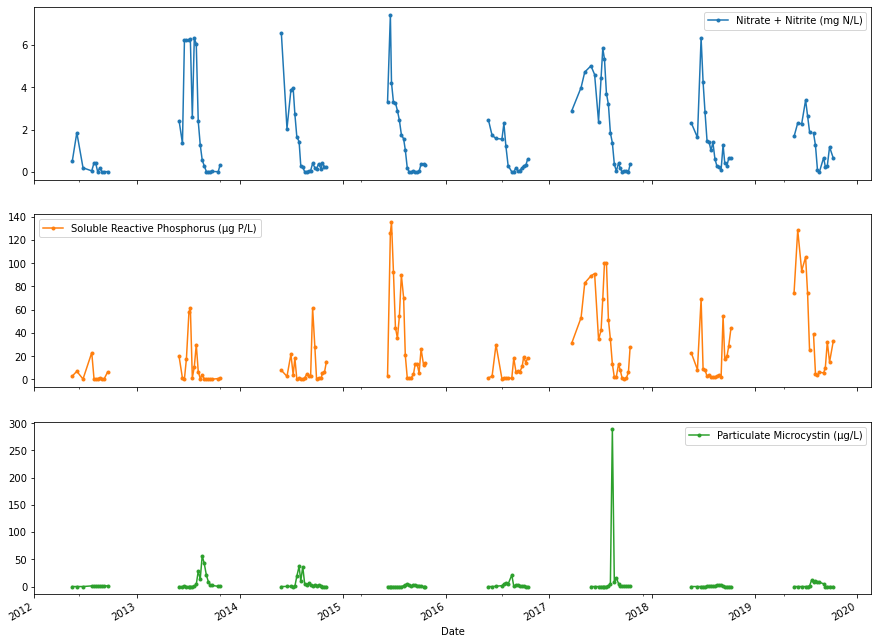

In [120]:
timeplot(we6, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'], 
         logy=False)

It's a little difficult to see the time-lag here because the spacing between the years compresses each summer of data. We can adjust the plot by using squish=True to only look at recorded dates, and using logy=True to use a log scale on the y-axis.

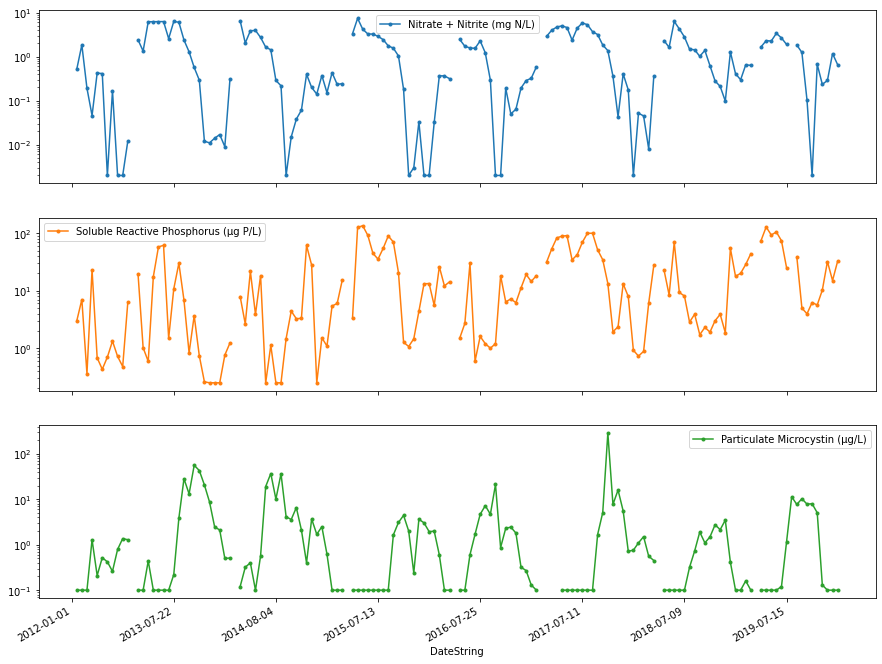

In [121]:
timeplot(we6, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'], 
         logy=True, squish=True)

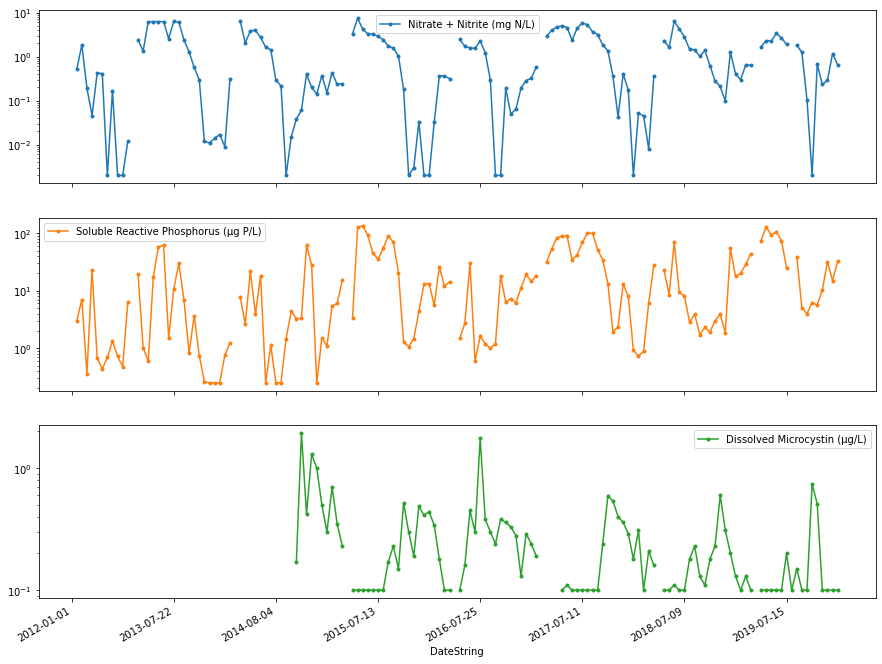

In [122]:
timeplot(we6, ['Nitrate + Nitrite (mg N/L)', 
               'Soluble Reactive Phosphorus (µg P/L)', 
               'Dissolved Microcystin (µg/L)'], 
         logy=True, squish=True)

There certainly appears to be a time lag between nutrient loading and particulate microcystin increase. In fact they seem to alternate with each other. This trend is also present with dissolved microcystin. 

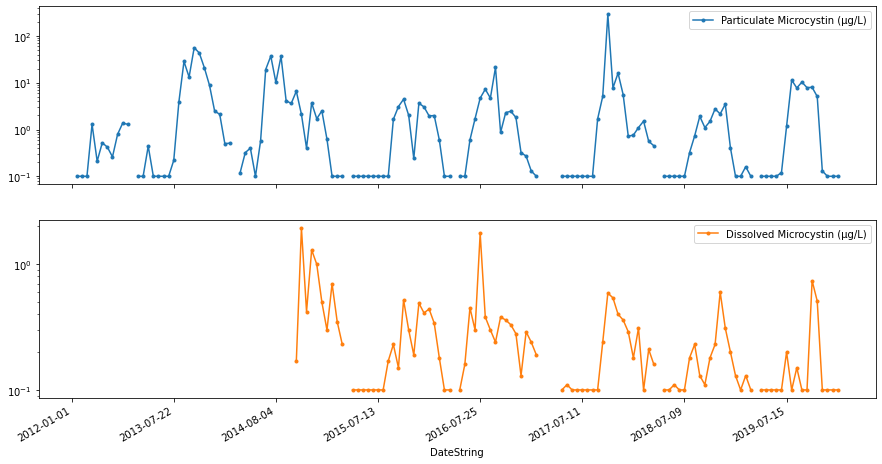

In [123]:
timeplot(we6, ['Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)'], logy=True, squish=True)

Dissolved and particulate microcystin seem to follow the same trend with no discernable lag in time. This is what we would perhaps expect, although it is not always the case. A USGS study, <a href='https://pubs.usgs.gov/sir/2012/5069/pdf/sir20125069.pdf'>Spatial and Temporal Dynamics of Cyanotoxins and Their Relation to Other Water Quality Variables in Upper Klamath Lake, Oregon, 2007–09</a>, found that dissolved and particulate microcystin did not follow the same exact trend over time. They noted that:

<p style="margin-left:10%; margin-right:10%;">"It is, therefore, difficult to interpret the meaning of the higher percentage of dissolved microcystins that year, particularly because the regulation of toxin production in cyanobacteria is not well understood and the microcystin content of individual cells may be highly variable. However, toxins are released into the water column primarily following death and senescence of a toxigenic bloom, so it is likely that higher dissolved microcystin concentrations in 2008 represent longer or more frequent periods of decline in the microcystin-producing population."</p>

This could suggest that the rise of dissolved microcystin as nutrients fall in the plots above indicates a die-off event.

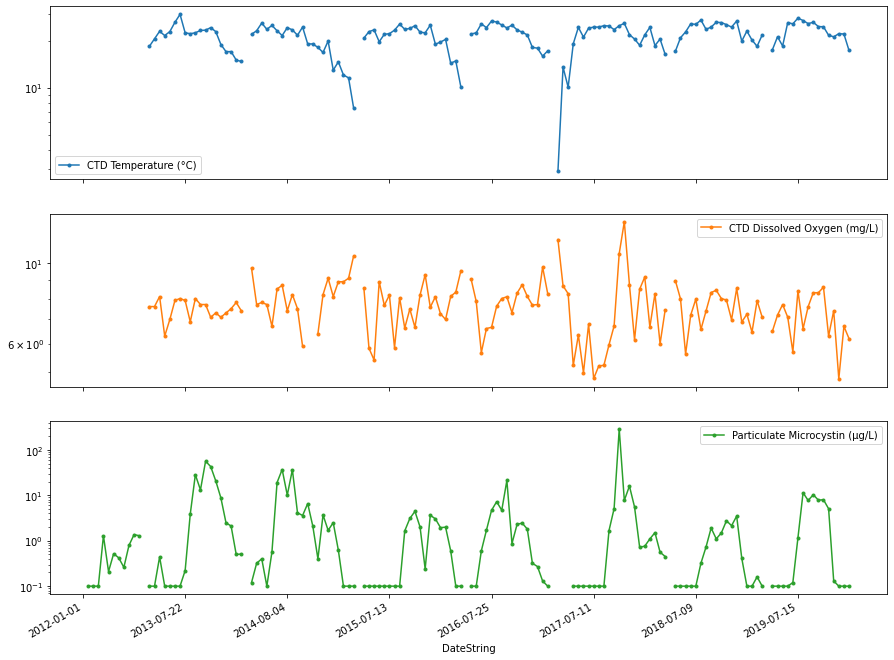

In [124]:
timeplot(we6, ['CTD Temperature (°C)', 
               'CTD Dissolved Oxygen (mg/L)', 
               'Particulate Microcystin (µg/L)'], logy=True, squish=True)

Particulate microcystin rises in late summer, after sustained warm temperatures. It is more difficult to draw meaningful conclusions regarding the relationship between dissolved oxygen, and particulate microcystin. Algae are obligate anaerobes, so they would be expected to die off in the absence of dissolved oxygen. We can examine the Dissolved Microcystin trend for signs of this. 

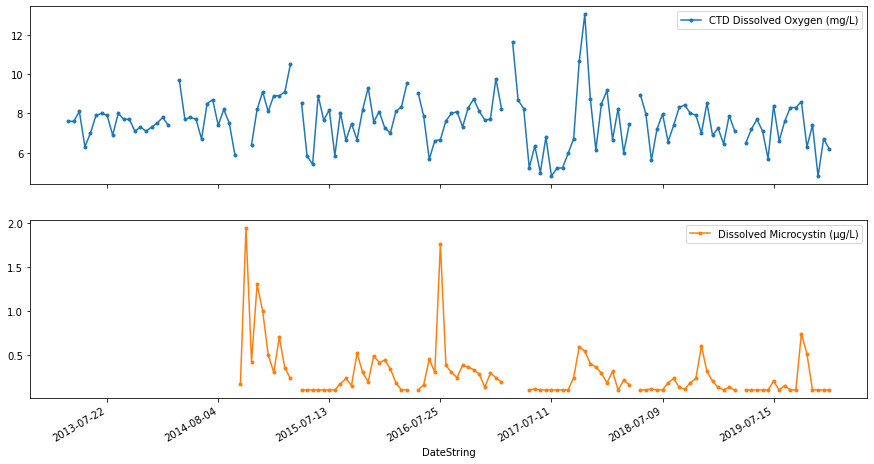

In [125]:
timeplot(we6, ['CTD Dissolved Oxygen (mg/L)', 'Dissolved Microcystin (µg/L)'], logy=False, squish=True)

Again with dissolved microcystin there is no clear relationship. The large peak in July 2016 in dissolved microcystin is preceeded by a sustained drop in dissolved oxygen, which again could suggest oxygen depletion leading to a die-off event and release of microcystin. However, the evidence is not strong enough to lead to any firm conclusions, especially since dissolved oxygen and microcystin seem to trend together in August of 2017. 

Let's examine another site to see if the time lag is consistent across locations.

In [126]:
#Locate WE8 measurements within proximity to each other
we8 = surface[(surface.Site == 'WE8') & (surface['Latitude (decimal deg)'] > 41.71)]

In [127]:
#Confirm that sites are close 
mapsites(we8)

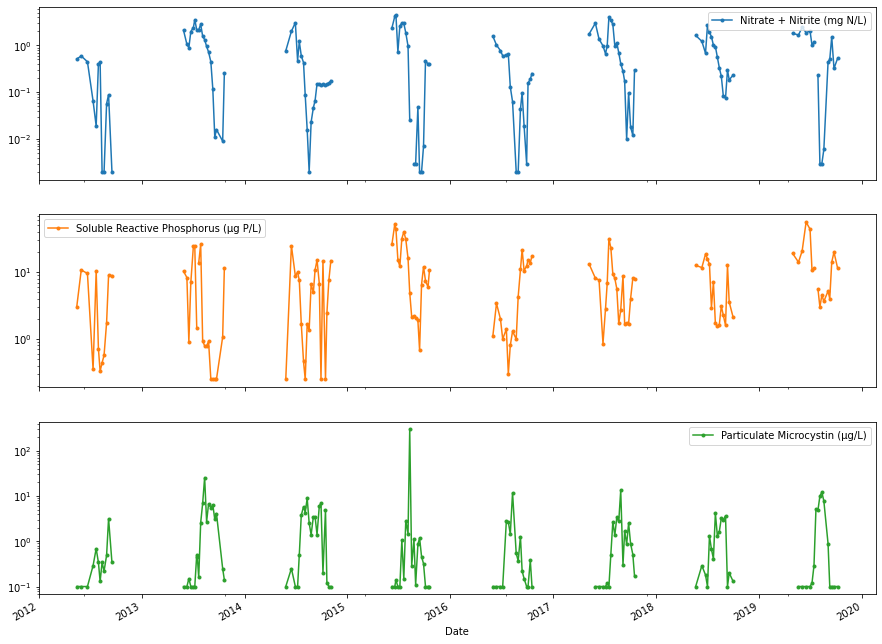

In [128]:
timeplot(we8, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'],
         logy=True, squish=False)

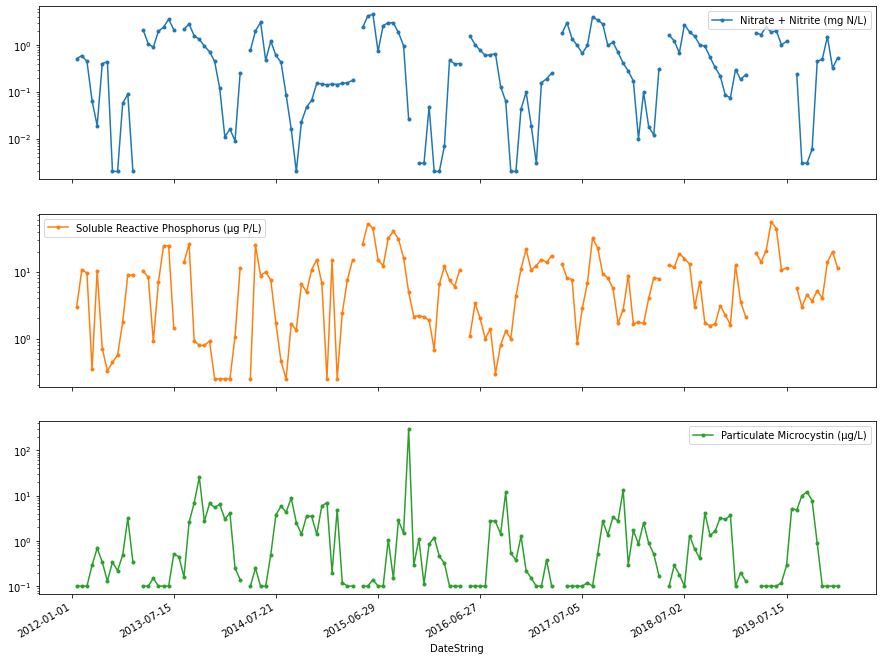

In [129]:
timeplot(we8, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'],
         logy=True, squish=True)

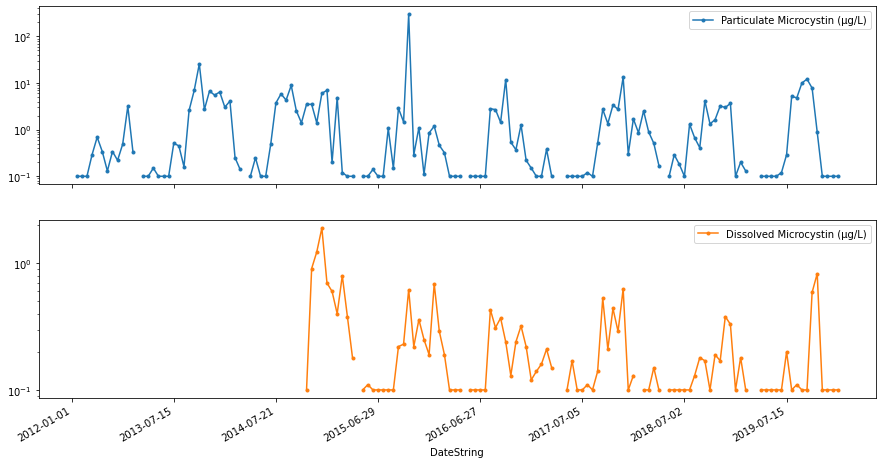

In [130]:
timeplot(we8, ['Particulate Microcystin (µg/L)','Dissolved Microcystin (µg/L)'], logy=True, squish=True)

The WE8 site trends are very similar to those for WE6. It does seem that there is a time lag between favorable HAB conditions and HAB formation.

What about sites that didn't have the highest recorded microcystin measurements?

In [131]:
we13 = surface[(surface.Site == 'WE13') & (surface['Latitude (decimal deg)'] > 41.71) & 
               (surface['Latitude (decimal deg)'] < 41.78) & (surface['Longitude (decimal deg)'] < -83.053)]

In [132]:
#confirm selected sites are close together
mapsites(we13)

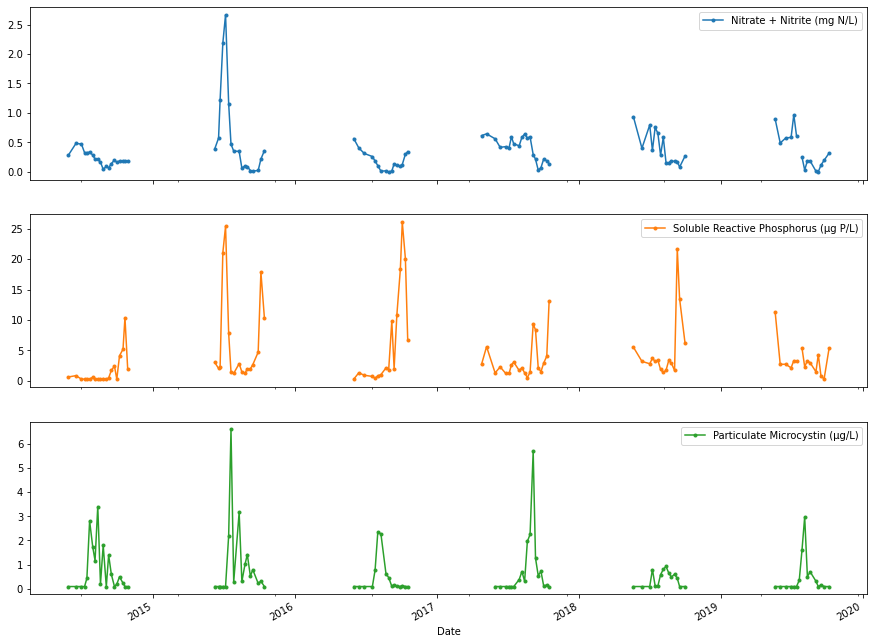

In [133]:
timeplot(we13, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'],
         logy=False, squish=False)

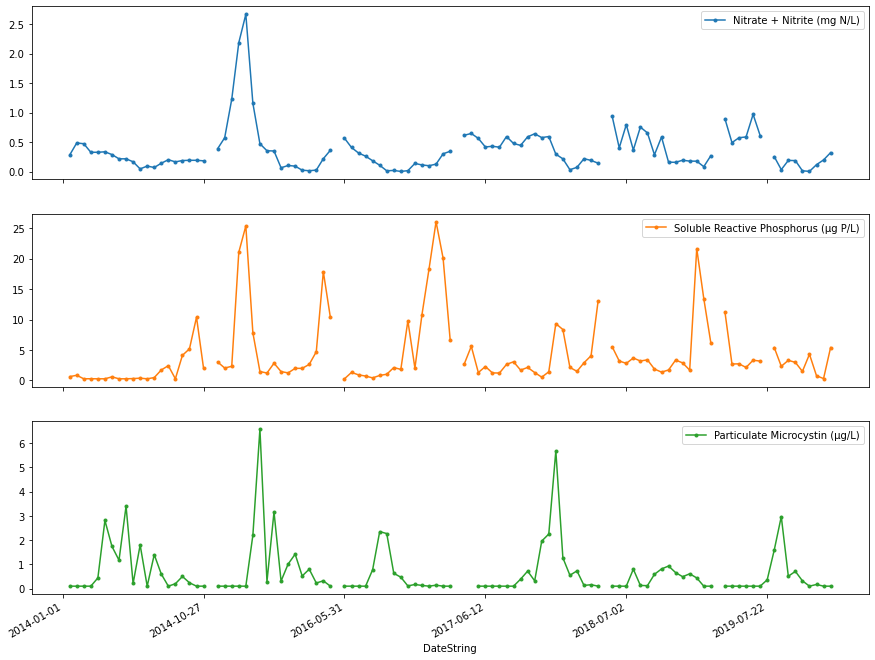

In [134]:
timeplot(we13, ['Nitrate + Nitrite (mg N/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Particulate Microcystin (µg/L)'],
         logy=False, squish=True)

The apparent lag is less pronounced here, and the range of the measurements in general is less extreme - note that the plots for WE13 are not using a log scale. This makes good intuitive sense if we expect that runoff at the coasts and river inlets are the main sources of nutrient loading. As more heavily polluted waters near the coasts mix with the body of the lake nutrient concentrations should tend to lower and have less fluctuation.

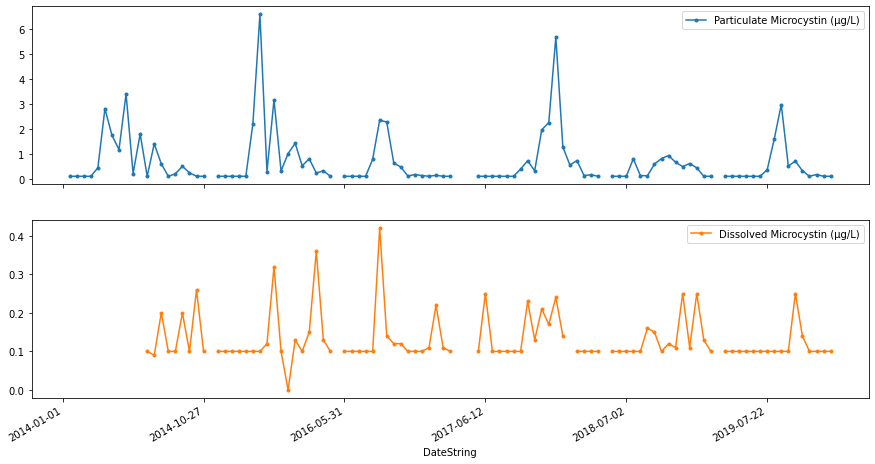

In [137]:
timeplot(we13, ['Particulate Microcystin (µg/L)','Dissolved Microcystin (µg/L)'], logy=False, squish=True)

## Site Difference

Is there a statistically significant difference in quantities of interest at different sites?

We have already selected dataframes for the sites WE6, WE8, and WE13. We can start by comparing WE6 and WE13. 

In [138]:
#difference in location
mapsites(we6.append(we13))

In [190]:
len(we6['Particulate Microcystin (µg/L)'].dropna()), len(we13['Particulate Microcystin (µg/L)'].dropna())

(140, 102)

In [225]:
def ecdf(df, col):
    x_data = np.sort(df[col].dropna())
    y_data = np.arange(1, len(x_data) + 1) / len(x_data)
    return x_data, y_data

In [226]:
def comp_ecdf(df1, df2, col, name1='df1', name2='df2'):
    """Compares the ECDF of a common column in two different data frames."""
    x_1, y_1 = ecdf(df1, col)
    x_2, y_2 = ecdf(df2, col)
    plt.plot(x_1, y_1, marker='.', linestyle=None, label=name1)
    plt.plot(x_2, y_2, marker='.', linestyle=None, label=name2)
    plt.xlabel(col)
    plt.ylabel('ECDF')
    plt.legend()
    plt.show()

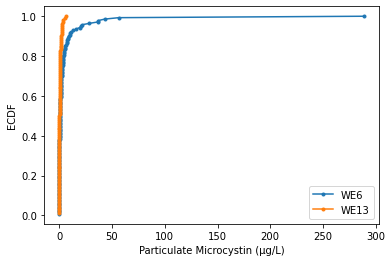

In [227]:
comp_ecdf(we6, we13, 'Particulate Microcystin (µg/L)', name1='WE6', name2='WE13')

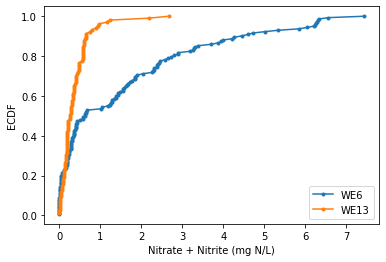

In [228]:
comp_ecdf(we6, we13, 'Nitrate + Nitrite (mg N/L)', name1='WE6', name2='WE13')

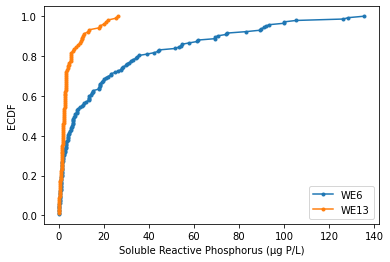

In [229]:
comp_ecdf(we6, we13, 'Soluble Reactive Phosphorus (µg P/L)', name1='WE6', name2='WE13')

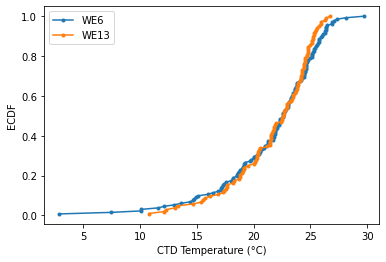

In [230]:
comp_ecdf(we6, we13, 'CTD Temperature (°C)', name1='WE6', name2='WE13')

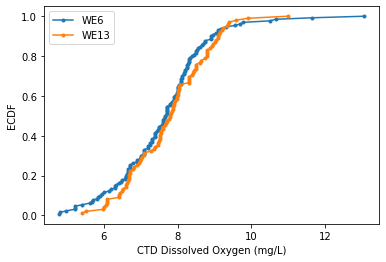

In [231]:
comp_ecdf(we6, we13, 'CTD Dissolved Oxygen (mg/L)', name1='WE6', name2='WE13')

From the ECDFs we can see that WE6 tends to have more of a right tail for all quantities, especialy nitrates and nitrites, and soluble reactive phosphorus. We can use bootstrapping to generate confidence intervals for averages of these quantities, and determine if the means at the different sites are truly different or just due to statistical variation. This requires the assumption that the ~100 observations at each site are representative of the population of measurements at each site, during the months in which samples were collected. 

In [232]:
def bs_samples(array, size=10000):
    bs = np.empty(size)
    for i in range(size):
        bs[i] = np.sum(np.random.choice(array, size=len(array))) / len(array)
    return bs

def bs_hist(df1, df2, col, name1='df1', name2='df2'):
    #get bootstrapped samples
    array1 = df1[col].dropna()
    array2 = df2[col].dropna()
    df1_bs = bs_samples(array1)
    df2_bs = bs_samples(array2)
    #plot histogram
    plt.hist(df1_bs, label=name1)
    plt.hist(df2_bs, label=name2)
    plt.xlabel('Bootstrapped Means of ' + col)
    plt.ylabel('Counts')
    plt.legend()
    plt.show()
    #print confidence interval
    print('The 95% confidence interval for', name1, col, 'mean is', 
          np.quantile(df1_bs, 0.025), 'to', np.quantile(df1_bs, 0.975))
    print('The 95% confidence interval for', name2, col, 'mean is', 
          np.quantile(df2_bs, 0.025), 'to', np.quantile(df2_bs, 0.975))

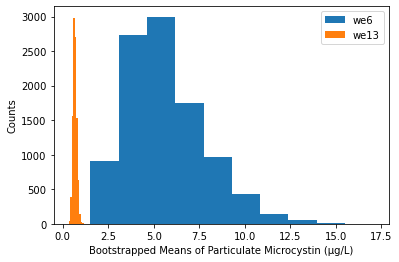

The 95% confidence interval for we6 Particulate Microcystin (µg/L) mean is 2.568525 to 10.461012500000002
The 95% confidence interval for we13 Particulate Microcystin (µg/L) mean is 0.4825441176470589 to 0.9024509803921565


In [233]:
bs_hist(we6, we13, 'Particulate Microcystin (µg/L)', name1='we6', name2='we13')

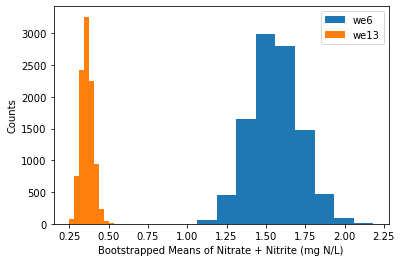

The 95% confidence interval for we6 Nitrate + Nitrite (mg N/L) mean is 1.2627455985915492 to 1.8674656690140845
The 95% confidence interval for we13 Nitrate + Nitrite (mg N/L) mean is 0.2937269417475728 to 0.4439252427184466


In [247]:
bs_hist(we6, we13, 'Nitrate + Nitrite (mg N/L)', name1='we6', name2='we13')

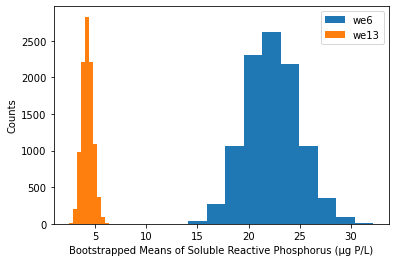

The 95% confidence interval for we6 Soluble Reactive Phosphorus (µg P/L) mean is 17.494383802816902 to 27.596751760563375
The 95% confidence interval for we13 Soluble Reactive Phosphorus (µg P/L) mean is 3.2566885922330093 to 5.371893446601941


In [248]:
bs_hist(we6, we13, 'Soluble Reactive Phosphorus (µg P/L)', name1='we6', name2='we13')

In [240]:
def diff_mean_test(df1, df2, col, size=10000):
    
    """Calculates the probability of a mean difference at least as large as the observed 
    difference assuming the null hypothesis."""
    
    #drop na values and compute averages
    arr1 = df1[col].dropna()
    arr2 = df2[col].dropna()
    arr1_mean = np.sum(arr1) / len(arr1)
    arr2_mean = np.sum(arr2) / len(arr2)
    avg_mean = (arr1_mean + arr2_mean) / 2
    mean_diff = arr1_mean - arr2_mean
    #shift arrays to have same average mean
    arr1_shift = arr1 - arr1_mean + avg_mean
    arr2_shift = arr2 - arr2_mean + avg_mean
    #bootstrap shifted arrays
    bs1 = bs_samples(arr1_shift, size=size)
    bs2 = bs_samples(arr2_shift, size=size)
    #calculate p value
    bs_diff = bs1 - bs2
    pval = np.sum(np.abs(bs_diff) >= np.abs(mean_diff)) / len(bs_diff)
    
    print('Difference in observed means is', 
          str(mean_diff) + '. The probability of observing this difference under the null hypothesis is', 
          str(pval * 100) + '%.')
    
    return pval

In [241]:
diff_mean_test(we6, we13, 'Particulate Microcystin (µg/L)')

Difference in observed means is 4.959752100840337. The probability of observing this difference under the null hypothesis is 2.65%.


0.0265

In [242]:
ttest_ind(we6['Particulate Microcystin (µg/L)'].dropna(), 
          we13['Particulate Microcystin (µg/L)'].dropna(), equal_var=False)

Ttest_indResult(statistic=2.3004901795410353, pvalue=0.02290143879169498)

It seems reasonable to reject the null hypothesis and accept that the particulate microcystin means of the two sites are different. 

In [243]:
ttest_ind(we6['Nitrate + Nitrite (mg N/L)'].dropna(), 
          we13['Nitrate + Nitrite (mg N/L)'].dropna(), equal_var=False)

Ttest_indResult(statistic=7.387586153337053, pvalue=8.196166908682048e-12)

In [244]:
diff_mean_test(we6, we13, 'Nitrate + Nitrite (mg N/L)')

Difference in observed means is 1.1916163681115821. The probability of observing this difference under the null hypothesis is 0.0%.


0.0

In [245]:
ttest_ind(we6['Soluble Reactive Phosphorus (µg P/L)'].dropna(), 
          we13['Soluble Reactive Phosphorus (µg P/L)'].dropna(), equal_var=False)

Ttest_indResult(statistic=6.793652468559253, pvalue=2.2684657889721016e-10)

In [246]:
diff_mean_test(we6, we13, 'Soluble Reactive Phosphorus (µg P/L)')

Difference in observed means is 18.03482168740599. The probability of observing this difference under the null hypothesis is 0.0%.


0.0

There is strong statistical evidence for rejecting the null hypothesis for nitrate + nitrite levels and soluble reactive phosphorus.

What about comparisons between other sites? Or perhaps it would be beneficial to record each site's distance from the Maumee River inlet and/or the shoreline? The shoreline could be a bit more complex, but the distance from the Maumee River inlet would not be difficult. I can also access data on flow and nutrient loading from the Maumee River <a href='https://ncwqr.org/monitoring/'>here</a>.

In [257]:
maumee_inlet = (41.695912, -83.465423)
for i in surface.index:
    coords = (surface.loc[i, 'Latitude (decimal deg)'], surface.loc[i, 'Longitude (decimal deg)'])
    distance = geopy.distance.distance(coords, maumee_inlet).km
    surface.loc[i, 'Distance from Maumee Inlet (km)'] = distance

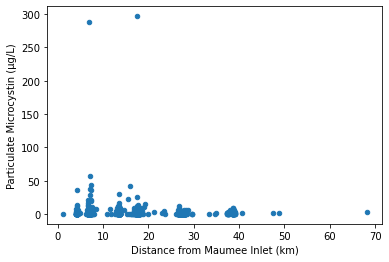

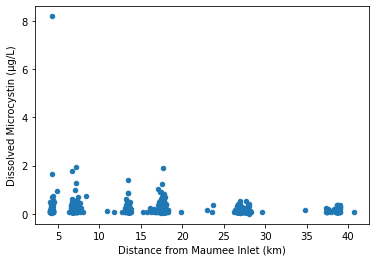

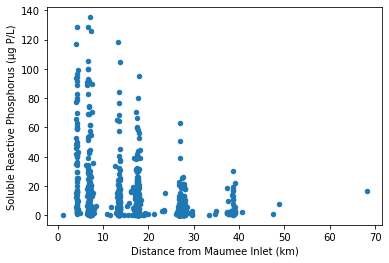

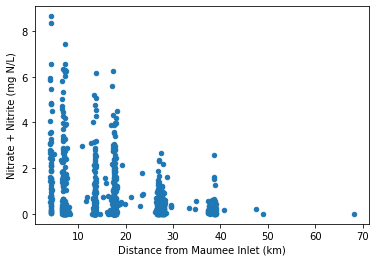

In [261]:
for col in ['Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)', 'Soluble Reactive Phosphorus (µg P/L)', 
            'Nitrate + Nitrite (mg N/L)']:
    surface.plot(x='Distance from Maumee Inlet (km)', y=col, kind='scatter')

It does seem that sites that are closer to the inlet have a much higher variance, and higher values tend to be at sites located close to the inlet, although there are not very many measurements at distances greater than 40 km, but it seems there are sufficient observations in the 20 to 40 km range.

Perhaps it would be interesting to try to predict seasonal nutrient concentration and subsequent HAB formation based on runoff (rainfall data combined with agricultural land coverage perhaps), nutrient loading from the river, and site location? Agricultural data on land coverage, climate precipitation, temperature,etc can be found through the USDA Natural Resources Conservation Service (data for state of Ohio <a href='https://datagateway.nrcs.usda.gov/GDGOrder.aspx?order=QuickState'>here</a>.